Importing numpy, pandas and matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12,12)

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loadings the files:
1. quant_scores = stock quant scores
2. total_returns = stock total returns
3. index_wts = stock index weights over time
4. index_return = return of the index

In [2]:
dfqs = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//quant_scores.csv', index_col = 0, parse_dates=True)
dftr = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//total_returns.csv', index_col = 0, parse_dates=True)
dfindwt = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//index_wts.csv', index_col = 0, parse_dates=True)
dfpsei = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//pcomp_return.csv', index_col = 0, parse_dates=True)

Checking the relationship of scores to forward performance of the stock.

I am going to do this by checking the regression line of performance versus the score.

In [3]:
def convert_to_pricelevel(dfinput):
    dfpl = dfinput
    x, y = dfpl.shape
    for a in range(0,x):
        for b in range(0,y):
            if (a==0) & (type(dfpl.loc[dfpl.index[a], dfpl.columns[b]])==np.float64) & (not(np.isnan(dfpl.loc[dfpl.index[a], dfpl.columns[b]]))):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = 1.00
            elif ((a+1)<x) & (np.isnan(dfpl.loc[dfpl.index[a], dfpl.columns[b]])) & (type(dfpl.loc[dfpl.index[np.minimum(a+1,x-1)], dfpl.columns[b]])==np.float64) & (not(np.isnan(dfpl.loc[dfpl.index[np.minimum(a+1,x-1)], dfpl.columns[b]]))):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = 1.00
            elif np.isnan(dfpl.loc[dfpl.index[a], dfpl.columns[b]]):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = np.nan
            elif (type(dfpl.loc[dfpl.index[a], dfpl.columns[b]])==np.float64) & (a>=1):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = dfpl.loc[dfpl.index[a-1], dfpl.columns[b]]*(1+(dfpl.loc[dfpl.index[a], dfpl.columns[b]]))
    return dfpl

In [4]:
#transforming the dftr into price levels

dfstockpl = convert_to_pricelevel(dftr/100)
dfstockpl.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,1.0000,NaN
36950,1.061224,0.838710,0.876712,0.916667,0.812500,0.940000,0.989583,1.018519,1.028571,0.912281,...,1.055556,NaN,NaN,NaN,0.906667,NaN,1.011111,NaN,1.1200,NaN
36981,1.061224,0.741935,0.712329,0.750000,0.781250,0.803419,0.875000,0.711112,0.952381,0.631579,...,0.925926,NaN,NaN,NaN,0.826667,NaN,0.888889,NaN,1.2544,NaN
37011,1.040816,0.758064,0.780822,0.750000,0.828125,0.779316,0.762501,0.696297,0.881834,0.666667,...,0.812216,NaN,NaN,NaN,0.800001,NaN,0.944444,NaN,1.2544,NaN
37042,1.020407,0.741935,1.520547,0.750000,0.786250,0.825915,0.804862,0.770371,0.881834,0.701756,...,0.828460,NaN,NaN,NaN,0.906667,NaN,0.933333,NaN,1.4560,NaN


In [5]:
#transforming the psei into price levels

dfpseipl =  convert_to_pricelevel(dfpsei)
dfpseipl.head(5)

,PCOMP TR,PCOMP Price
36922,1.000000,1.000000
36950,0.956997,0.956426
36980,0.859226,0.857380
37011,0.819519,0.817333
37042,0.835018,0.831233


Creating the x month return dataframe function

In [6]:
def x_monthforwardreturn(x, dfinput):
    dfinput_x = dfinput.shift(-int(x))
    dfret_x = dfinput_x/dfinput - 1
    return dfret_x

Applying function to the dataframe (3 month forward return below)

In [7]:
dfstockplret_3m = x_monthforwardreturn(3, dfstockpl)
print (dfstockplret_3m.shape)
dfstockplret_3m.head(5)

(192, 76)


,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,4.081560e-02,-0.241936,-0.219178,-0.250000,-0.171875,-0.220684,-0.237499,-0.303703,-0.118166,-0.333333,...,-0.187784,NaN,NaN,NaN,-1.999994e-01,NaN,-0.055556,NaN,0.254400,NaN
36950,-3.846192e-02,-0.115385,0.734375,-0.181818,-0.032308,-0.121367,-0.186665,-0.243636,-0.142661,-0.230768,...,-0.215143,NaN,NaN,NaN,9.512957e-08,NaN,-0.076923,NaN,0.300000,NaN
36981,-3.952941e-07,-0.021740,1.307692,0.282222,0.046656,0.050107,-0.043848,0.177083,-0.071759,-0.027777,...,-0.087368,NaN,NaN,NaN,4.838647e-02,NaN,0.063291,NaN,-0.107143,NaN
37011,-1.960847e-02,-0.051064,0.929825,0.183590,-0.069554,0.276310,0.041667,0.010638,0.002500,-0.131579,...,-0.184000,NaN,NaN,NaN,1.366662e-01,NaN,0.050781,NaN,0.035714,NaN
37042,-1.800004e-01,-0.074506,-0.144144,0.158932,-0.110000,0.198924,-0.131579,-0.105770,-0.007525,-0.175000,...,-0.200000,NaN,NaN,NaN,6.764677e-02,NaN,0.063291,NaN,-0.230769,NaN


In [8]:
dfpseiTRpl = pd.DataFrame(dfpseipl['PCOMP TR'])
dfpseiTRpl.head(5)

,PCOMP TR
36922,1.000000
36950,0.956997
36980,0.859226
37011,0.819519
37042,0.835018


In [9]:
dfpseiTR_3m = x_monthforwardreturn(3, dfpseiTRpl)
print (dfpseiTR_3m.shape)
dfpseiTR_3m.head(5)

(192, 1)


,PCOMP TR
36922,-0.180481
36950,-0.127461
36980,-0.022783
37011,-0.008849
37042,-0.091904


Subtracting the columns to the price return of PCOMP

In [10]:
#rounding to 6 digits
dfstockplret_3m = round(dfstockplret_3m,6)
dfpseiTR_3m = round(dfpseiTR_3m,6)

#converting dfpseiTR_3m into a series so that I can subtract it from the dataframe of stock 3m forward returns
tempSeries = [x for x in dfpseiTR_3m['PCOMP TR']]
tempSeries

dfoutperf_3m = dfstockplret_3m.sub(tempSeries, axis=0)
print (dfoutperf_3m.shape)
dfoutperf_3m.head(5)

(192, 76)


,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,0.221297,-0.061455,-0.038697,-0.069519,0.008606,-0.040203,-0.057018,-0.123222,0.062315,-0.152852,...,-0.007303,NaN,NaN,NaN,-0.019518,NaN,0.124925,NaN,0.434881,NaN
36950,0.088999,0.012076,0.861836,-0.054357,0.095153,0.006094,-0.059204,-0.116175,-0.015200,-0.103307,...,-0.087682,NaN,NaN,NaN,0.127461,NaN,0.050538,NaN,0.427461,NaN
36981,0.022783,0.001043,1.330475,0.305005,0.069439,0.072890,-0.021065,0.199866,-0.048976,-0.004994,...,-0.064585,NaN,NaN,NaN,0.071169,NaN,0.086074,NaN,-0.084360,NaN
37011,-0.010759,-0.042215,0.938674,0.192439,-0.060705,0.285159,0.050516,0.019487,0.011349,-0.122730,...,-0.175151,NaN,NaN,NaN,0.145515,NaN,0.059630,NaN,0.044563,NaN
37042,-0.088096,0.017398,-0.052240,0.250836,-0.018096,0.290828,-0.039675,-0.013866,0.084379,-0.083096,...,-0.108096,NaN,NaN,NaN,0.159551,NaN,0.155195,NaN,-0.138865,NaN


In [11]:
dfqs.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,NaN,-0.062443,-0.053796,0.307173,0.196642,0.516090,-0.406294,-0.482474,NaN,NaN,...,NaN,0.307173,NaN,NaN,NaN,NaN,0.516090,NaN,NaN,NaN
36950,NaN,-0.035469,-0.050858,0.196175,0.275168,-0.364142,-0.229654,-0.417662,NaN,NaN,...,NaN,0.196175,NaN,NaN,NaN,NaN,-0.364142,NaN,NaN,NaN
36981,NaN,0.258605,0.328888,-0.095036,-0.132697,0.055743,0.147378,0.116802,NaN,NaN,...,NaN,-0.095036,NaN,NaN,NaN,NaN,0.055743,NaN,NaN,NaN
37011,NaN,0.382619,0.074050,-0.842184,-0.392563,0.369888,0.301919,0.543440,NaN,NaN,...,NaN,-0.842184,NaN,NaN,NaN,NaN,0.369888,NaN,NaN,NaN
37042,NaN,-0.540034,0.028212,0.086328,0.624103,0.287636,0.212853,-0.094265,NaN,NaN,...,NaN,0.086328,NaN,NaN,NaN,NaN,0.287636,NaN,NaN,NaN


In [12]:
dfqs_perf = pd.DataFrame(columns=['Date', 'Stock','Quant Score', 'Performance'])

x, y = dfqs.shape
for a in range(0,192):
    for b in range(0,76):
        w = dfqs.index[int(a)]
        x = dfqs.columns[int(b)]
        y = dfqs.loc[dfqs.index[int(a)], dfqs.columns[int(b)]]
        z = dfoutperf_3m.loc[dfqs.index[int(a)], dfqs.columns[int(b)]]
        dftemp = pd.DataFrame([[w, x, y, z]], columns=['Date', 'Stock','Quant Score', 'Performance'])
        dfqs_perf = dfqs_perf.append(dftemp, ignore_index=True)

dfqs_perf.head(5)

,Date,Stock,Quant Score,Performance
0,36922,BCI,NaN,0.221297
1,36922,ION,-0.062443,-0.061455
2,36922,ICT,-0.053796,-0.038697
3,36922,URC,0.307173,-0.069519
4,36922,UBP,0.196642,0.008606


In [13]:
#delete all rows with NaN
dfqs_perf_no_nan = dfqs_perf.dropna(axis=0,how='any')
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance
1,36922,ION,-0.062443,-0.061455
2,36922,ICT,-0.053796,-0.038697
3,36922,URC,0.307173,-0.069519
4,36922,UBP,0.196642,0.008606
5,36922,SMCB,0.516090,-0.040203


In [14]:
#export to csv

dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan.csv')

Creating the scatter plot and linear regression fit on Quant scores vs 3 month performance

In [15]:
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan.csv', index_col=0)
dfqs_perf_no_nan.reset_index()
print (dfqs_perf_no_nan.shape)
dfqs_perf_no_nan.head(5)

(4246, 4)


,Date,Stock,Quant Score,Performance
1,36922,ION,-0.062443,-0.061455
2,36922,ICT,-0.053796,-0.038697
3,36922,URC,0.307173,-0.069519
4,36922,UBP,0.196642,0.008606
5,36922,SMCB,0.516090,-0.040203


In [16]:
#add weight column
x, y = dfqs_perf_no_nan.shape
templist1 = [dfindwt.loc[dfqs_perf_no_nan.loc[dfqs_perf_no_nan.index[z], 'Date'], \
                        dfqs_perf_no_nan.loc[dfqs_perf_no_nan.index[z], 'Stock']] for z in range(0,x)]
templist2 = [dfqs_perf_no_nan.index[z] for z in range(0,x)]
dftemp = pd.DataFrame(templist1, index=templist2, columns=['Weight'])
dfqs_perf_no_nan = pd.concat([dfqs_perf_no_nan, dftemp], axis=1)
dfqs_perf_no_nan = dfqs_perf_no_nan.dropna(axis=0,how='any')
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight
1,36922,ION,-0.062443,-0.061455,0.006037
2,36922,ICT,-0.053796,-0.038697,0.003040
3,36922,URC,0.307173,-0.069519,0.000000
4,36922,UBP,0.196642,0.008606,0.000000
5,36922,SMCB,0.516090,-0.040203,0.040741


In [17]:
#checking

dfqs_perf_no_nan.where(dfqs_perf_no_nan['Stock']=='TEL').dropna(axis=0,how='any')

,Date,Stock,Quant Score,Performance,Weight
14302,42643.0,TEL,-0.081198,-0.10058,0.051497


In [18]:
dfqs_perf_no_nan['Wtd Performance'] = dfqs_perf_no_nan['Performance']*dfqs_perf_no_nan['Weight']
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance
1,36922,ION,-0.062443,-0.061455,0.006037,-0.000371
2,36922,ICT,-0.053796,-0.038697,0.003040,-0.000118
3,36922,URC,0.307173,-0.069519,0.000000,-0.000000
4,36922,UBP,0.196642,0.008606,0.000000,0.000000
5,36922,SMCB,0.516090,-0.040203,0.040741,-0.001638


In [19]:
#export with weights
dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_wts.csv')

In [20]:
#reimport dataframe from csv
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_wts.csv', \
                               index_col = 0, parse_dates=True)
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance
1,36922,ION,-0.062443,-0.061455,0.006037,-0.000371
2,36922,ICT,-0.053796,-0.038697,0.003040,-0.000118
3,36922,URC,0.307173,-0.069519,0.000000,-0.000000
4,36922,UBP,0.196642,0.008606,0.000000,0.000000
5,36922,SMCB,0.516090,-0.040203,0.040741,-0.001638


In [21]:
#remove zero weight
dfqs_perf_no_nan = dfqs_perf_no_nan.drop(dfqs_perf_no_nan[dfqs_perf_no_nan['Weight']==0].index)
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance
1,36922,ION,-0.062443,-0.061455,0.006037,-0.000371
2,36922,ICT,-0.053796,-0.038697,0.003040,-0.000118
5,36922,SMCB,0.516090,-0.040203,0.040741,-0.001638
6,36922,ABS,-0.406294,-0.057018,0.033921,-0.001934
7,36922,FLI,-0.482474,-0.123222,0.010345,-0.001275


In [22]:
#remove months which are not 3, 6, 9 or 12
from datetime import datetime

dfqs_perf_no_nan['Date 2'] = dfqs_perf_no_nan['Date'] + datetime(1900, 1, 1).toordinal() - 2
dfqs_perf_no_nan['Date 3'] = dfqs_perf_no_nan['Date 2'].apply(datetime.fromordinal)
dfqs_perf_no_nan['Date 3'] = dfqs_perf_no_nan['Date 3'].apply(pd.to_datetime)
dfqs_perf_no_nan['Month'] = dfqs_perf_no_nan['Date 3'].map(lambda x: x.month)

dfqs_perf_no_nan = dfqs_perf_no_nan.where((dfqs_perf_no_nan['Month']==3)|(dfqs_perf_no_nan['Month']==6)|(dfqs_perf_no_nan['Month']==9)\
                      |(dfqs_perf_no_nan['Month']==12))
dfqs_perf_no_nan = dfqs_perf_no_nan.dropna(axis=0,how='any')
print (dfqs_perf_no_nan.shape)
dfqs_perf_no_nan.head(5)

(1044, 9)


,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Date 2,Date 3,Month
153,36981.0,ION,0.258605,0.001043,0.005131,0.000005,730575.0,2001-03-31,3.0
154,36981.0,ICT,0.328888,1.330475,0.002481,0.003301,730575.0,2001-03-31,3.0
157,36981.0,SMCB,0.055743,0.072890,0.037337,0.002721,730575.0,2001-03-31,3.0
158,36981.0,ABS,0.147378,-0.021065,0.034002,-0.000716,730575.0,2001-03-31,3.0
159,36981.0,FLI,0.116802,0.199866,0.008427,0.001684,730575.0,2001-03-31,3.0


In [23]:
#export

dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_month.csv')

In [24]:
#reimport
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_month.csv', \
                               index_col = 0, parse_dates=True)

In [25]:
#remove outliers
dfqs_perf_no_nan.describe()

,Date,Quant Score,Performance,Weight,Wtd Performance,Date 2,Month
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,40002.501916,0.023385,0.000902,0.037804,-0.000103,733596.501916,7.436782
std,1701.919996,0.478224,0.147252,0.025567,0.004471,1701.919996,3.329295
min,36981.000000,-1.714508,-0.666115,0.000147,-0.025780,730575.000000,3.000000
25%,38533.000000,-0.235640,-0.075660,0.017713,-0.002116,732127.000000,3.000000
50%,40040.000000,0.019567,-0.008030,0.032196,-0.000132,733634.000000,6.000000
75%,41547.000000,0.280284,0.062099,0.055835,0.001848,735141.000000,9.000000
max,42643.000000,1.781846,1.632932,0.124902,0.025381,736237.000000,12.000000


In [26]:
dfqs_perf_no_nan = dfqs_perf_no_nan[dfqs_perf_no_nan['Performance']<1]
dfqs_perf_no_nan = dfqs_perf_no_nan[dfqs_perf_no_nan['Performance']>-0.4]
dfqs_perf_no_nan.describe()

,Date,Quant Score,Performance,Weight,Wtd Performance,Date 2,Month
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,40013.526468,0.023054,-0.000231,0.037945,-0.000097,733607.526468,7.435034
std,1697.909568,0.478178,0.128341,0.025543,0.004452,1697.909568,3.333049
min,36981.000000,-1.714508,-0.344514,0.000147,-0.025780,730575.000000,3.000000
25%,38533.000000,-0.236064,-0.075397,0.017923,-0.002112,732127.000000,3.000000
50%,40086.000000,0.019567,-0.007980,0.032394,-0.000131,733680.000000,6.000000
75%,41547.000000,0.279415,0.061993,0.055986,0.001844,735141.000000,9.000000
max,42643.000000,1.781846,0.966541,0.124902,0.025381,736237.000000,12.000000


In [27]:
#creating trendline datapoints
vars1 = np.polyfit(x=dfqs_perf_no_nan['Quant Score'], y=dfqs_perf_no_nan['Performance'], deg=1)
print (vars1)
poly1 = np.poly1d(vars1)
dfqs_perf_no_nan['Trendline1'] = poly1(dfqs_perf_no_nan['Quant Score'])

vars2 = np.polyfit(x=dfqs_perf_no_nan['Quant Score'], y=dfqs_perf_no_nan['Wtd Performance'], deg=1)
print (vars2)
poly2 = np.poly1d(vars2)
dfqs_perf_no_nan['Trendline2'] = poly2(dfqs_perf_no_nan['Quant Score'])

dfqs_perf_no_nan.head(5)

[ 0.03190258 -0.00096643]
[ 0.00068751 -0.00011331]


,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Date 2,Date 3,Month,Trendline1,Trendline2
153,36981.0,ION,0.258605,0.001043,0.005131,0.000005,730575.0,2001-03-31,3.0,0.007284,0.000064
157,36981.0,SMCB,0.055743,0.072890,0.037337,0.002721,730575.0,2001-03-31,3.0,0.000812,-0.000075
158,36981.0,ABS,0.147378,-0.021065,0.034002,-0.000716,730575.0,2001-03-31,3.0,0.003735,-0.000012
159,36981.0,FLI,0.116802,0.199866,0.008427,0.001684,730575.0,2001-03-31,3.0,0.002760,-0.000033
164,36981.0,SMPH,-0.071061,0.033720,0.063918,0.002155,730575.0,2001-03-31,3.0,-0.003233,-0.000162


In [29]:
#export

dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_trendline.csv')

In [30]:
#reimport
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_trendline.csv', \
                               index_col = 0, parse_dates=True)
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Date 2,Date 3,Month,Trendline1,Trendline2
153,36981.0,ION,0.258605,0.001043,0.005131,0.000005,730575.0,2001-03-31,3.0,0.007284,0.000064
157,36981.0,SMCB,0.055743,0.072890,0.037337,0.002721,730575.0,2001-03-31,3.0,0.000812,-0.000075
158,36981.0,ABS,0.147378,-0.021065,0.034002,-0.000716,730575.0,2001-03-31,3.0,0.003735,-0.000012
159,36981.0,FLI,0.116802,0.199866,0.008427,0.001684,730575.0,2001-03-31,3.0,0.002760,-0.000033
164,36981.0,SMPH,-0.071061,0.033720,0.063918,0.002155,730575.0,2001-03-31,3.0,-0.003233,-0.000162


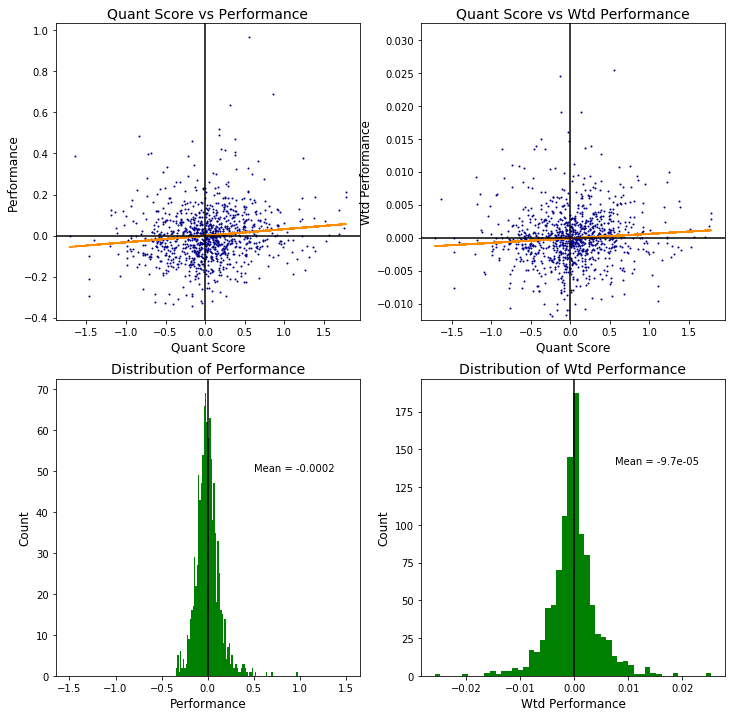

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.scatter(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Performance'], s=1, color='DarkBlue')
ax1.plot(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Trendline1'], color='DarkOrange')
ax1.axhline(y=0, color='Black')
ax1.axvline(x=0, color='Black')
ax1.set_title('Quant Score vs Performance', size=14)
ax1.set_xlabel('Quant Score', size=12)
ax1.set_ylabel('Performance', size=12)
ax2 = fig.add_subplot(223)
ax2.hist(dfqs_perf_no_nan['Performance'], bins=200, color='Green', range=[-1.5,1.5])
ax2.axvline(x=dfqs_perf_no_nan['Performance'].mean(), color='Black')
ax2.set_title('Distribution of Performance', size=14)
ax2.set_xlabel('Performance', size=12)
ax2.set_ylabel('Count', size=12)
ax2.text(0.50,50,'Mean = ' + str(round(dfqs_perf_no_nan['Performance'].mean(),4)))

ax3 = fig.add_subplot(222)
ax3.scatter(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Wtd Performance'], s=1, color='DarkBlue')
ax3.set_ylim(-0.0125,0.0325)
ax3.plot(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Trendline2'], color='DarkOrange')
ax3.axhline(y=0, color='Black')
ax3.axvline(x=0, color='Black')
ax3.set_title('Quant Score vs Wtd Performance', size=14)
ax3.set_xlabel('Quant Score', size=12)
ax3.set_ylabel('Wtd Performance', size=12)
ax4 = fig.add_subplot(224)
ax4.hist(dfqs_perf_no_nan['Wtd Performance'], bins=50, color='Green')
ax4.axvline(x=dfqs_perf_no_nan['Wtd Performance'].mean(), color='Black')
ax4.set_title('Distribution of Wtd Performance', size=14)
ax4.set_xlabel('Wtd Performance', size=12)
ax4.set_ylabel('Count', size=12)
ax4.text(0.0075,140,'Mean = ' + str(round(dfqs_perf_no_nan['Wtd Performance'].mean(),6)))

plt.show()